In [1]:
from datetime import datetime
import pandas as pd # Reading datasets
import numpy as np #Operations on our dataset
import matplotlib.pyplot as plt #Visualization library
import seaborn as sns #Enhanced visualization library


At first I need to import the data into the notebook, and start looking it over.

In [2]:
#Reading through the train dataset

df = pd.read_csv(r"F:\Courses\Data Science bootcamp\rfm_data.csv")

df.head() 

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


Now inorder to calculate RFM, I need to add columns representing Recency, Frequency and Monetary Value.  

In [3]:
# Calculating Recency:
# I substracted the current date from the recorded date for each customer, and extracted the DAY from it.

df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])
Recency = (datetime.today() - df["PurchaseDate"]).dt.days
df["Recency"] = Recency

In [4]:
# Calculating Frequency:
# I used groupby to get the values for each Customer and then utilized count() on "Order ID" to find out how many purchases each customer had. Using reset_index I make it a table suitable for Merge or Join, as the length of groupby result will not be the same as number of rows in original data frame.

Frequency = df.groupby("CustomerID")["OrderID"].count().reset_index()
Frequency = Frequency.rename(columns = {"OrderID":"Frequency"})
df = df.merge(Frequency, on = "CustomerID", how = "left") 

In [5]:
# Calculating Monetary Value: Same as Frequency

Monetary_Value = df.groupby("CustomerID")["TransactionAmount"].sum().reset_index()
Monetary_Value.rename(columns = {"TransactionAmount":"Monetary Value"}, inplace = True)
df = df.merge(Monetary_Value, on = "CustomerID", how = "left")

Calculating RFM: I should give each of the new columns a rating from 1 to 5 and then add them together.

In [9]:
x = [i+1 for i in range(5)]
ascending_intervals = x.copy()
x.reverse()
descending_intervals = x
del x

# Calculating the scores
Recency_score = pd.cut(df["Recency"],bins = 5, labels = descending_intervals)
Frequency_score = pd.cut(df["Recency"],bins = 5, labels = ascending_intervals)
Monetary_Value_score = pd.cut(df["Monetary Value"],bins = 5, labels = ascending_intervals)

df["RFM_Value"] = Recency_score.astype(int) + Frequency_score.astype(int) + Monetary_Value_score.astype(int)
df["RFM"] = pd.cut(df["RFM_Value"], bins = 3, labels = ["Low Value", "Medium Value", "High Value"])

Now I check to make sure the changes are acutualy applied

In [10]:
df.head(20)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary Value,RFM_Value,RFM
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,180,1,943.31,8,Low Value
1,2188,2023-04-11,463.70,Product A,176819,London,180,1,463.70,7,Low Value
2,4608,2023-04-11,80.28,Product A,340062,New York,180,1,80.28,7,Low Value
3,2559,2023-04-11,221.29,Product A,239145,London,180,1,221.29,7,Low Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,180,1,739.56,8,Low Value
5,8483,2023-04-11,375.23,Product C,691194,Paris,180,1,375.23,7,Low Value
6,8317,2023-04-11,272.56,Product B,826847,New York,180,2,974.88,9,Medium Value
7,6911,2023-04-11,433.33,Product C,963918,Tokyo,180,1,433.33,7,Low Value
8,8993,2023-04-12,16.55,Product D,112426,New York,179,1,16.55,7,Low Value
9,3519,2023-04-12,464.63,Product C,139726,New York,179,1,464.63,7,Low Value


In [11]:
#Information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   Monetary Value      1000 non-null   float64       
 9   RFM_Value           1000 non-null   int32         
 10  RFM                 1000 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), int64(4), object(2)
memory usage: 83.1+ KB


In [50]:
#Descriptive Statistics on the dataset, only numerical columns

df.describe()

,CustomerID,TransactionAmount,OrderID,Recency,Frequency,Monetary Value,RFM_Value
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5554.789000,513.67781,554071.398000,150.689000,1.114000,574.213190,7.707000
std,2605.014863,286.09870,264695.448814,17.323579,0.345142,361.582057,0.737357
min,1011.000000,12.13000,100096.000000,120.000000,1.000000,12.130000,7.000000
25%,3273.000000,257.12000,313152.000000,135.000000,1.000000,283.925000,7.000000
50%,5538.000000,523.56500,564671.500000,152.000000,1.000000,566.710000,8.000000
75%,7821.750000,759.86000,783052.250000,165.000000,1.000000,805.372500,8.000000
max,9991.000000,999.44000,999695.000000,180.000000,3.000000,2379.450000,11.000000


As we can see below, there are only 22 High Value customers, So the column will probably be extremely skewed  towards left 

In [51]:
print(df['RFM'].value_counts()["High Value"])

22


Now I will start visualizing columns with various charts and graphs  

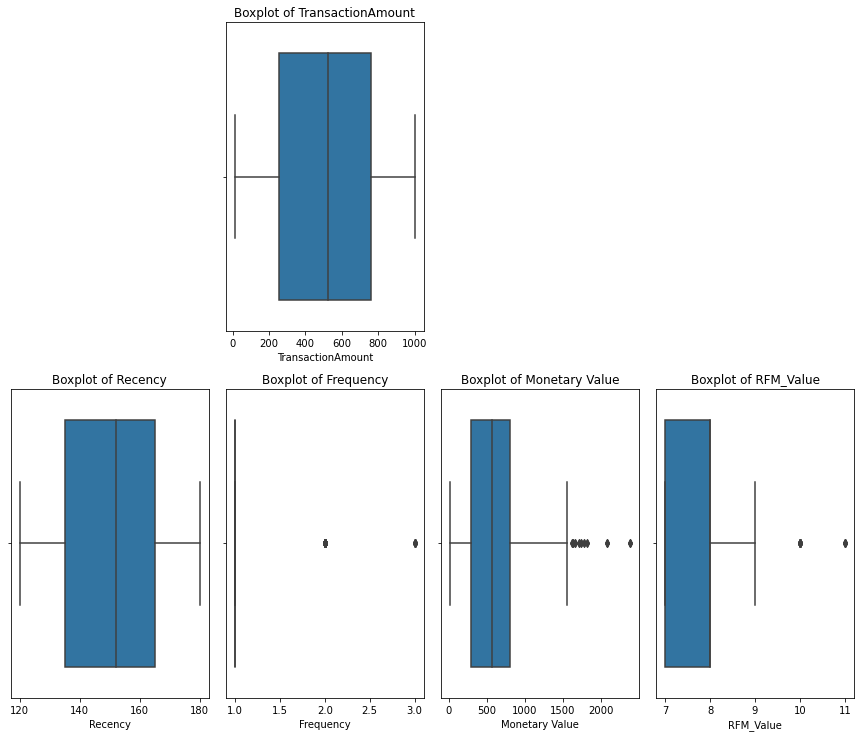

In [54]:
import warnings

# To suppress all warnings:
warnings.filterwarnings('ignore')

# Checking distributions of the various features in the dataset

# id_rows represents 
id_rows = ["CustomerID", "OrderID", "PurchaseDate", "RFM"]

plt.figure(figsize=(15, 5 * 3))  # Adjust the figure size based on the number of rows

for i, col in enumerate(df, 1):
    if df[col].dtype != 'object' and col not in id_rows:
        plt.subplot(3, 5, i)  # 4 columns per row
        sns.boxplot(x=df[col], orient='vertical')
        plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

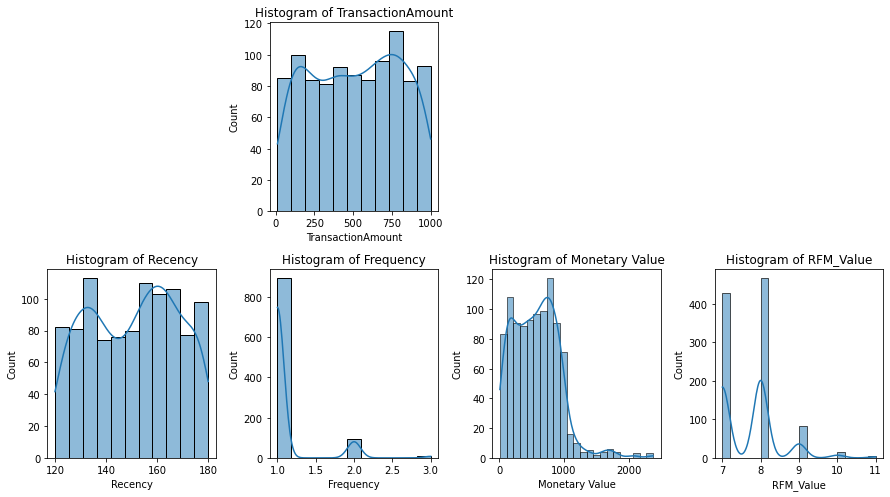

In [23]:
#More visualization on distributions

plt.figure(figsize=(15, 10))

for i, col in enumerate(df, 1):
    if df[col].dtype != 'object' and col not in id_rows:
        plt.subplot(3, 5, i) 
        sns.histplot(df[col], kde=True)  # Create a histogram with a kernel density estimate
        plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

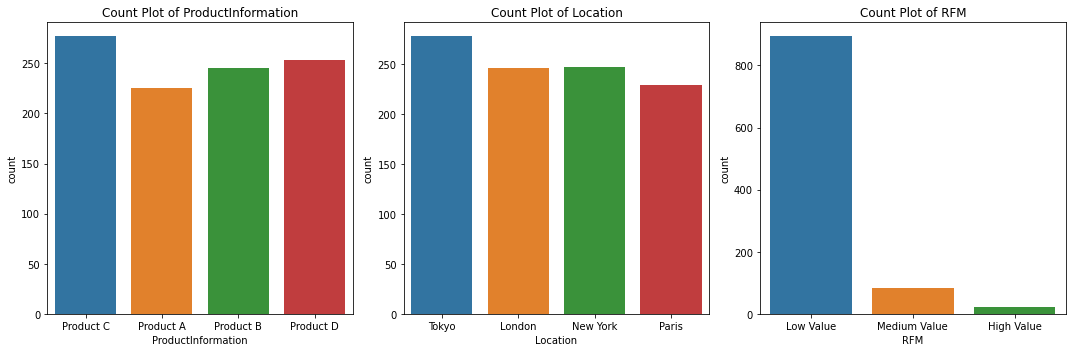

In [24]:
#Distribution of categorical columns

# Identify and filter categorical columns
types = ["category", "object"]
categorical_cols = [col for col in df.columns if df[col].dtype.name in types]

# Calculate the number of rows needed based on the number of categorical columns
num_col = len(categorical_cols)
num_row = (num_col + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_row))  # Adjust the figure size based on the number of rows

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_row, 3, i)  # 3 columns per row
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

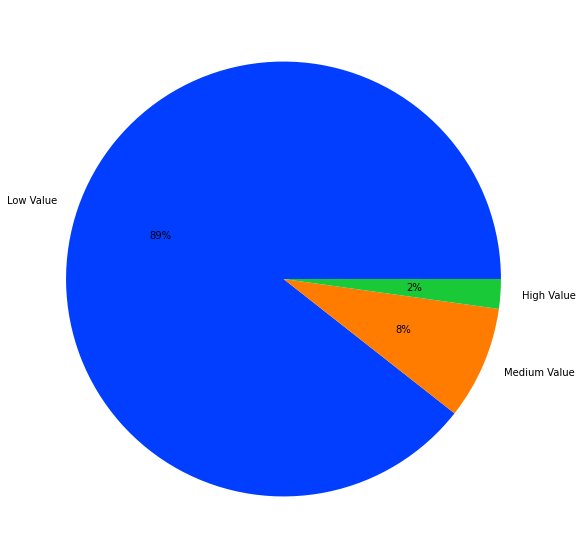

The number of Low Value customers is 894
The number of Medium Value customers is 84
The number of High Value customers is 22


In [47]:
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

data = [df['RFM'].value_counts()["Low Value"],df['RFM'].value_counts()["Medium Value"], df['RFM'].value_counts()["High Value"]]
# plotting data on chart 
plt.figure(figsize=(15, 10))
plt.pie(data, labels = ["Low Value", "Medium Value", "High Value"], colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 
count = 0
V = ""
for x in data:
    if count == 0:
        V = "Low Value"
    elif count == 1:
        V = "Medium Value"
    else:
        V = "High Value"
    print(f"The number of {V} customers is {x}")
    count += 1

del count, V